# Trabalho 1 - Tipo: SÍSMICA
Descrição do trabalho:

http://webserver2.tecgraf.puc-rio.br/~mgattass/visao/trb/T1.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Mudando o diretório para o meu Google Drive para não precisar ficar baixando os datasets novamente.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd "drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1/"

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


In [3]:
!pwd

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


### Imports

In [4]:
!pip install segyio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.4 MB/s 


In [5]:
import numpy as np
import segyio
import matplotlib.pyplot as plt

Origem dos dados

[Indicar a origem dos dados]

In [48]:
def load_segy( fname ):

    with segyio.open( fname, ignore_geometry=True ) as file:
    # with segyio.open( fname ) as file:

        # Get basic attributes
        n_traces = file.tracecount
        sample_rate = segyio.tools.dt( file ) / 1000
        n_samples = file.samples.size
        time = file.samples
        amplitude = file.trace.raw[:]

        return n_traces, n_samples, sample_rate, time, amplitude

In [49]:
path = './imagens/sismica/'

In [50]:
# fname = path + 'CDPSyn200t_801m.sgy'
# fname = path + 'Equinor_issap20_AI.sgyhdr'
fname = path + 'Seismic_data.sgy'

In [51]:
%%time

n_traces, n_samples, dt_samples, time_axis, data = load_segy( fname )

print( f'Número de traços do volume: {n_traces}' )
print( f'Número de amostras por traço: {n_samples}' )
print( f'Delta t de amostragem (dta): {dt_samples} ms' )
print()

Número de traços do volume: 600515
Número de amostras por traço: 462
Delta t de amostragem (dta): 4.0 ms

CPU times: user 412 ms, sys: 515 ms, total: 927 ms
Wall time: 1.93 s


In [109]:
# informação tirada da internet 915 traços por seção inline
# n_inlines = 651
n_inlines = 631
n_crosslines = 951
print( f'n_inlines: {n_inlines}' )
print( f'n_crosslines: {n_crosslines}' )
print( f'n_traces: {n_traces}' )
print( f'n_inlines * n_crosslines: {n_inlines * n_crosslines}' )

n_inlines: 631
n_crosslines: 951
n_traces: 600515
n_inlines * n_crosslines: 600081


In [110]:
# 631 * 951 = 600081
# 600515 - 600081 = 434

data.shape

(600515, 462)

In [142]:
new_data = data[ :-434 ]
# new_data = data[ 434: ]

# new_data = data[ 4340: ]
# n_inlines = 651

# new_data = data
# new_data[0] = [ 0 for i in range(0, 434) ]

print(len( new_data ))
print( new_data.shape )

600081
(600081, 462)


In [143]:
vol = new_data.reshape( ( n_inlines, n_crosslines, n_samples ) )
print( vol.shape )

(631, 951, 462)


In [144]:
inline = n_inlines//2
crossline = n_crosslines//2
timeline = n_samples//2

print( f'inline: {inline}' )
print( f'crossline: {crossline}' )
print( f'timeline: {timeline}' )

inline: 315
crossline: 475
timeline: 231


In [132]:
# inline - 500

In [145]:
inline_section = vol[ inline, :, : ]
crossline_section = vol[ crossline, :, : ]
timeline_section = vol[ timeline, :, : ]

print( f'inline_section: {inline_section}' )
print( f'crossline_section: {crossline_section}' )
print( f'timeline_section: {timeline_section}' )

inline_section: [[    0     0     0 ... -2173 -2562 -3992]
 [    0     0     0 ... -1933 -4013 -6252]
 [    0     0     0 ... -2013 -5531 -7224]
 ...
 [    0     0     0 ... -4550 -7985 -2829]
 [    0     0     0 ... -3307 -8067 -3674]
 [    0     0     0 ... -3183 -9304 -4059]]
crossline_section: [[    0     0     0 ... -3505 -1317   140]
 [    0     0     0 ... -3318 -2314  -214]
 [    0     0     0 ... -2303  -447   294]
 ...
 [    0     0     0 ...  3330  3269  1416]
 [    0     0     0 ...   -36    12  1385]
 [    0     0     0 ...   830  -533 -3008]]
timeline_section: [[    0     0     0 ...   724 -1379  -119]
 [    0     0     0 ...  -571  -969  1588]
 [    0     0     0 ... -2247   356  2916]
 ...
 [    0     0     0 ...  1175  2900  1705]
 [    0     0     0 ...  1697  3056  1522]
 [    0     0     0 ...  2197  3036   715]]


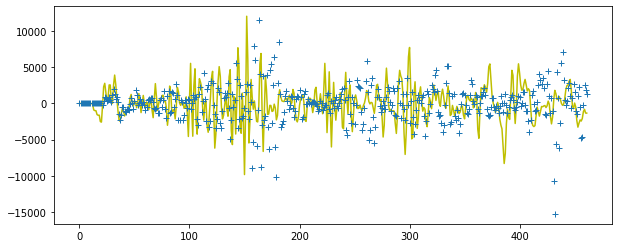

In [165]:
x = np.linspace( 
    0, 
    n_samples - 1, 
    n_samples )
trace1 = inline_section[ crossline, : ]
trace2 = crossline_section[ inline + 5, : ] ######################################## Está deslocado... Os dados estão errados: faltando dados, para poder ficar igual ao do professor.

plt.figure( figsize=(10, 4) )
plt.plot( x, trace1, 'y' )
plt.plot( x, trace2, '+' )
plt.show()